## **سوال ۳**

الف)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


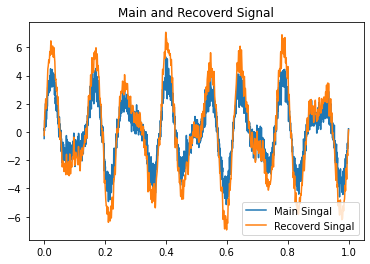

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as fft

f = open("Signal.txt", "r")
signal = []
for x in f:
  signal.append(float(x))

sample_rate = len(signal) / 2
sample_rate = int(sample_rate)
nyqu = sample_rate // 2

t = np.linspace(0, 1, 2*sample_rate)
freqs = np.linspace(0, (4*nyqu) - 1, 4*nyqu)

def complex1(_t, freqs):
  return np.exp(-1j * freqs * _t)

def complex2(_freq, t):
  return np.exp(1j * _freq * t)

def dot1(f, freqs_, t_, coef):
  ft = []
  for x in t_:
    ft.append(np.dot(f, complex1(x, freqs_)) / coef)
  return ft

def dot2(f, freqs_, t_):
  ft = []
  for f_ in freqs_:
    ft.append(np.dot(f, complex2(f_, t_)))
  return ft

dot_signal = dot1(signal, freqs, t, 4*sample_rate)
freqs2 = np.arange(0, (nyqu * 4), 1)
idot_signal = dot2(dot_signal, freqs2, t)

plt.plot(t, signal)
plt.plot(t, idot_signal)
plt.title("Main and Recoverd Signal")
plt.legend(["Main Singal", "Recoverd Singal"], loc ="lower right")

ب)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


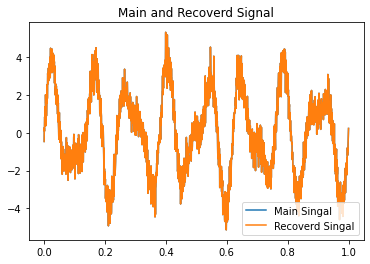

In [18]:
ft_signal = fft.fft(signal)
ift_signal = fft.ifft(ft_signal)

plt.plot(t, signal)
plt.plot(t, ift_signal)
plt.title("Main and Recoverd Signal")
plt.legend(["Main Singal", "Recoverd Singal"], loc ="lower right")

ج)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


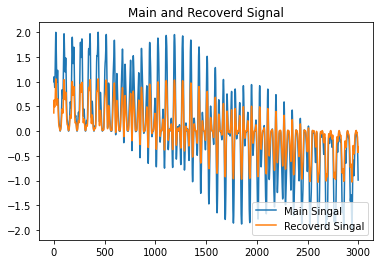

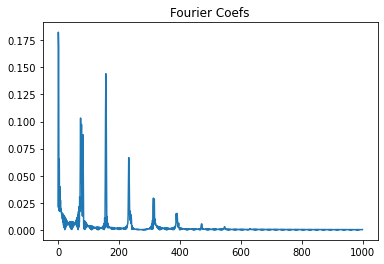

In [77]:
from numpy.lib.shape_base import expand_dims
samp_rate = 1000
t_new = np.linspace(0, 3, 3*samp_rate)
freqs_new = np.arange(0, samp_rate, 1)

k_t = (1 + np.sin(2 * np.pi * 12 * t)) * np.cos(np.sin(2 * np.pi * 25 * t) + t)

def build_exp1(freqs_, t_, j_):
  exp_ = []
  for tt in t_:
    exp_.append(np.exp(j_ * freqs_ * tt))
  return exp_

def build_exp2(freqs_, t_, j_):
  exp_ = []
  for ff in freqs_:
    exp_.append(np.exp(j_ * ff * t_))
  return exp_

ft_k = np.dot(k_t, build_exp1(freqs_new, t_new, -1j)) / (6 * samp_rate)
ift_k = np.dot(ft_k, build_exp2(freqs_new, t_new, 1j))

plt.plot(k_t)
plt.plot(ift_k)
plt.legend(["Main Singal", "Recoverd Singal"], loc ="lower right")
plt.title("Main and Recoverd Signal")
plt.show()

plt.plot(np.absolute(ft_k))
plt.title("Fourier Coefs")
plt.show()

د)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


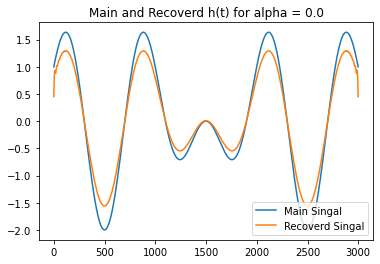

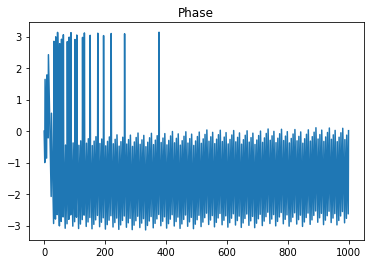

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


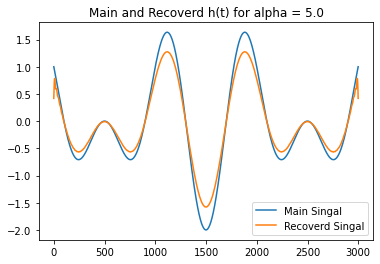

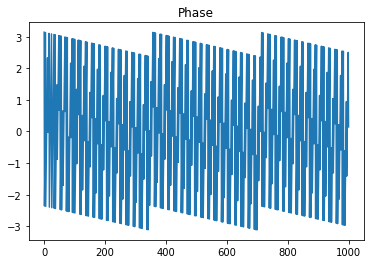

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


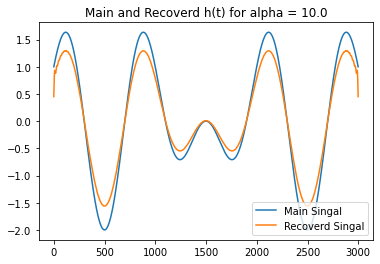

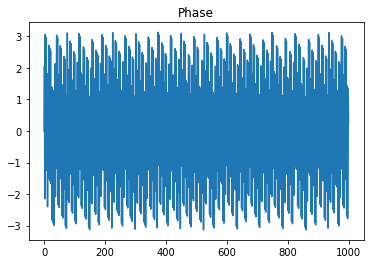

In [78]:
t_new2 = np.linspace(0, 1, 3000)
alpha = np.linspace(0, 10, 3)

def recover(alpha):
  h_t = np.sin(2 * np.pi * 4.5 * (t_new2+alpha)) + np.cos(2 * np.pi * 3 * (t_new2+alpha))
  ft_h = np.dot(h_t, build_exp1(freqs_new, t_new2+alpha, -1j)) / (len(t_new2) * 4) 
  ift_h = np.dot(ft_h, build_exp2(freqs_new, t_new2+alpha, 1j))
  plt.plot(h_t)
  plt.plot(ift_h)
  plt.legend(["Main Singal", "Recoverd Singal"], loc ="lower right")
  plt.title("Main and Recoverd h(t) for alpha = " + str(alpha))
  plt.show()
  plt.plot(np.angle(ft_h))
  plt.title("Phase")
  plt.show()

recover(alpha[0])
recover(alpha[1])
recover(alpha[2])



ه)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.ifft is deprecated and will be removed in SciPy 2.0.0, use scipy.fft.ifft instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Sine Wave with frequency 10 Hz')

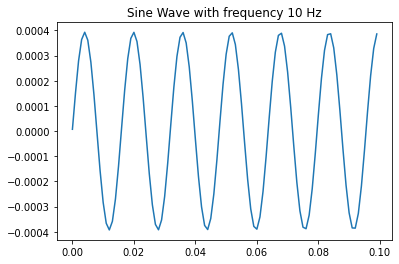

In [74]:
t_new3 = np.linspace(0, 2, samp_rate*2)
freqs = np.arange(0, samp_rate, 1)

M_t = np.sin(2 * np.pi * 4 * t_new3) + np.sin(2 * np.pi * 10 * t_new3)
ft_M = np.dot(M_t, build_exp1(freqs, t_new3, -1j)) / (4*len(t_new3))

sin_4hz = np.sin(2 * np.pi * 4 * t_new3)
ft_sin_4hz = np.dot(sin_4hz, build_exp1(freqs, t_new3, -1j)) / (4*len(t_new3))

rem_ft = ft_M - ft_sin_4hz
recoverd_M = fft.ifft(rem_ft)

plt.plot(t_new3[:100], recoverd_M[:100])
plt.title("Sine Wave with frequency 10 Hz")